### Descrição do problema
Em um jogo infinito com probabilidade P_n de ganhar, dado um montante $M_0$ inicial em certa rodada $n$, a odd multiplicativa é calculada como: 
$$ odd = \frac{1}{P}$$
existe uma estratégia puramente numérica para minimizar as perdas? 


#### Estratégia 1:
Dada uma probabilidade de ganho $P_n$ aleatória em uma certa rodada $n$, você aposta $P$% do montante $M_n$

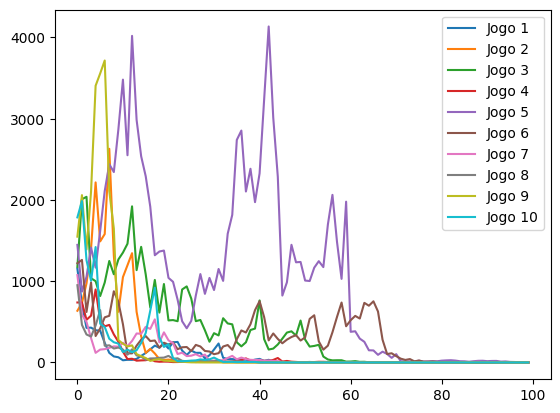

In [59]:
import random
import numpy as np
import matplotlib.pyplot as plt

r = 100
rounds = np.arange(r)
games = []
M_0 = 1000
for j in range(10):
    M = []
    M_n = M_0
    for i in range(r):
        prob = random.random()   # probability of winning
        bet = M_n * prob         # P% of the Mn
        resto = M_n - bet       # (1 - odd) M_n
        if random.random() < prob: 
            multiplier = 1 / prob 
            M.append((bet * multiplier) + resto)
            M_n = resto + (bet * multiplier)
        else: 
            M.append(resto)
            M_n = resto
    mountain = np.array(M)
    plt.plot(rounds, mountain,  label=f'Jogo {j+1}')
plt.legend()
plt.show()


### Estratégia 2:
Dada uma probabilidade de ganho $P_n$ aleatória em uma certa rodada $n$, você aposta $\frac{P}{2}$% do montante $M_n$

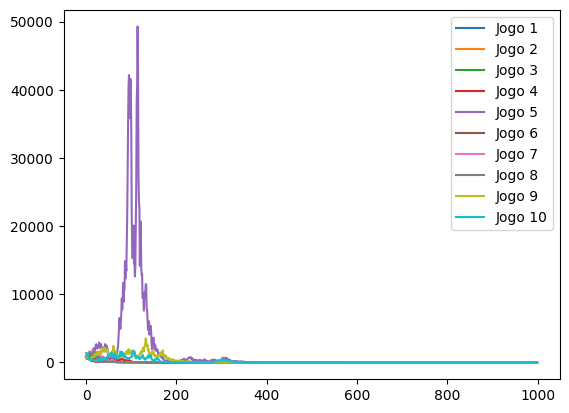

In [60]:
r = 1000
rounds = np.arange(r)

M_0 = 1000
for j in range(10):
    M = []
    M_n = M_0
    for i in range(r):
        prob = random.random()   # probability of winning
        bet = M_n * prob/2         # P% of the Mn
        resto = M_n - bet       # (1 - odd) M_n
        if random.random() < prob: 
            multiplier = 1 / prob 
            M.append((bet * multiplier) + resto)
            M_n = resto + (bet * multiplier)
        else: 
            M.append(resto)
            M_n = resto
    mountain = np.array(M)
    plt.plot(rounds, mountain, label=f'Jogo {j+1}')
plt.legend()
plt.show()

### Estratégia 3:
Dada uma probabilidade de ganho $P_n$ aleatória em uma certa rodada $n$, você aposta $\frac{P_n}{k+1}$% do montante $M_n$, no k-ésimo jogo

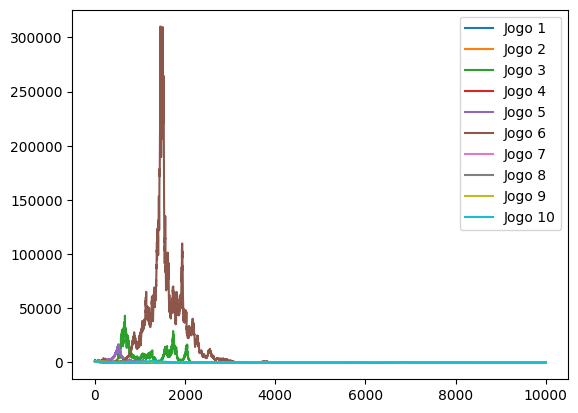

In [99]:
r = 10000
rounds = np.arange(r)

M_0 = 1000
for j in range(10):
    M = []
    M_n = M_0
    for i in range(r):
        prob = random.random()   # probability of winning
        bet = M_n * prob/(j+2)         # P% of the Mn
        resto = M_n - bet       # (1 - odd) M_n
        if random.random() < prob: 
            multiplier = 1 / prob 
            M.append((bet * multiplier) + resto)
            M_n = resto + (bet * multiplier)
        else: 
            M.append(resto)
            M_n = resto
    mountain = np.array(M)
    plt.plot(rounds, mountain, label=f'Jogo {j+1}')
plt.legend()
plt.show()

#### Conclusão das Estratégias iniciais:
Nos três casos, é possivel verificar que, na grande maioria das vezes, o montante $M_n$ vai para zero quando o números de rodadas é grande.
Vamos verificar, através da Estratégia 3 o valor médio do montante, e para isso, para cada k-ésimo jogo, vamos rodar 100 vezes e tirar a média dos jogos:

In [93]:
r = 10000
rounds = np.arange(r)

M_0 = 1000
for k in range(10):
    k_game = np.array([])
    for j in range(100):
        M = []
        M_n = M_0
        for i in range(r):
            prob = random.random()   # probability of winning
            bet = M_n * prob/(k+2)         # P% of the Mn
            resto = M_n - bet       # (1 - odd) M_n
            if random.random() < prob: 
                multiplier = 1 / prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto
        mountain = np.array(M)
        mean = np.mean(mountain)
        k_game = np.append(k_game, mean)
        k_mean = np.mean(k_game)
    print(f'jogo: {k}, média: {int(k_mean)}, perda: {(1-(k_mean/M_0))*100:.2f}%')


jogo: 0, média: 37, perda: 96.26%
jogo: 1, média: 46, perda: 95.38%
jogo: 2, média: 131, perda: 86.82%
jogo: 3, média: 88, perda: 91.12%
jogo: 4, média: 439, perda: 56.01%
jogo: 5, média: 189, perda: 81.02%
jogo: 6, média: 973, perda: 2.61%
jogo: 7, média: 431, perda: 56.88%
jogo: 8, média: 358, perda: 64.18%
jogo: 9, média: 739, perda: 26.04%


#### Estratégia 4:
Um possível problema das estratégias anteriores é que, em certas rodadas, até era possivel ter um ganho percentual razoável, mas como a bet dependia do montante naquela rodada, as vezes a bet era muito alta. Assim, a estratégia será: <br><br>
Dada uma probabilidade de ganho $P_n$ aleatória em uma certa rodada $n$, você aposta $P_n$% do montante $M_0$


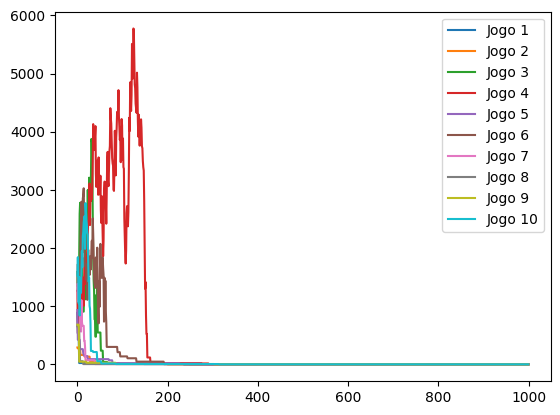

In [117]:
r = 1000
rounds = np.arange(r)
games = []
M_0 = 1000
for j in range(10):
    M = []
    M_n = M_0
    for i in range(r):
        prob = random.random()   # probability of winning
        bet = M_0 * prob         # P% of the Mn
        resto = M_n - bet       # (1 - odd) M_n
        if resto > 0:
            if random.random() < prob: 
                multiplier = 1 / prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto
        else:
            M.append(M_n)
            
    mountain = np.array(M)
    plt.plot(rounds, mountain,  label=f'Jogo {j+1}')
plt.legend()
plt.show()

#### Estratégia 5
Vimos que a capacidade das estratégias em chegar em números bem maiores do que o montante inicial é comum, mas as estratégias foram incapazes de serem consistentes em grandes números de jogadas
Vamos adotar a seguinte estratégia agora:
Em certo montante M_n, podemos calcular a razao $$R=\frac{M_n}{M_0}$$
Caso $R>=1$ podemos reduzir a bet quanto maior for o $R$, de forma que:
$$bet=\frac{M_0 \times P_n}{R}=\frac{M_0^2 \times P_n}{M_n}$$


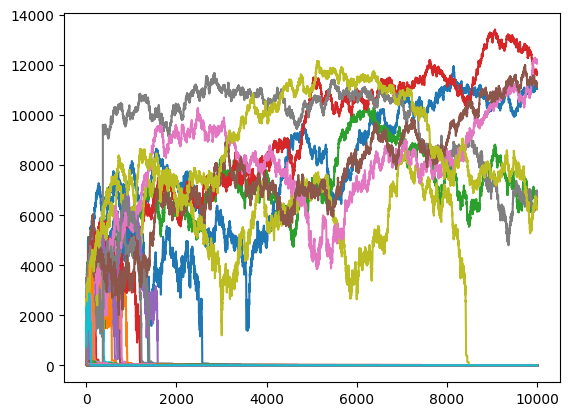

In [138]:
r = 10000
rounds = np.arange(r)
games = []
M_0 = 1000
for j in range(100):
    M = []
    M_n = M_0
    for i in range(r):
        prob = random.random()   # probability of winning
        R = M_n / M_0
        bet = M_0 * prob / (R) 
        resto = M_n - bet       # (1 - odd) M_n
        if resto > 0:
            if random.random() < prob: 
                multiplier = 1 / prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto
        else:
            M.append(M_n)
            
    mountain = np.array(M)
    plt.plot(rounds, mountain)

plt.show()

Veja que essa estratégia conseguiu, de certa forma, atingir seus objetivos: se manter consistente com o número de rodadas aumentando, e ter um retorno alto.<br>
Porém, existe alguns problemas de simplificação nesse problema:<br>
1) A probabilidade $P_n$ é puramente aleatória, entre 0 e 1.
2) A odd que multiplica o montante, em todas as estratégias foi definida préviamente como:
$$odd = \frac{1}{P_n}$$
É conhecido no senso comum que a maioria das apostas não possuem uma probabilidade aleatória, mas que gira em torno de 50%, e também que as odds não são sempre calculadas dessa forma, pois há uma margem para a casa.
Vamos estabelecer, então, que a probabilidade varia entre 40% e 60% de forma aleatória, e que a odd multiplicativa é calculada como:
$$ odd' = 0.8 \times odd = \frac{0.8}{P_n} $$
de forma que 20% do ganho vá para a casa.
Vamos ver o que acontece se usarmos essa nova $odd$:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


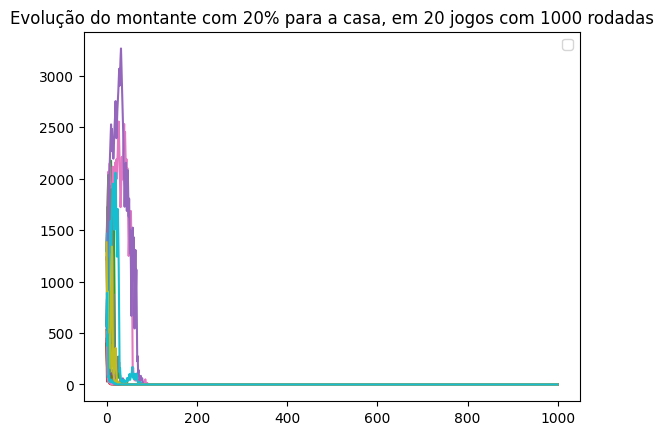

In [203]:
r = 1000
rounds = np.arange(r)
games = []
M_0 = 1000
for j in range(20):
    M = []
    M_n = M_0
    for i in range(r):
        prob = 0.5 + (((random.random()*2)-1)/10)   # probability of winning
        R = M_n / M_0
        if R >=1 :
            bet = M_0 * prob / (R)
        else: 
            bet = M_0 * prob
        resto = M_n - bet       # (1 - odd) M_n

        if resto > 0:

            if random.random() < prob: 
                multiplier = 0.8/ prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto

        else:
            if R >=1 :
                bet = M_n * prob / (R)
            else: 
                bet = M_n * prob
            resto = M_n - bet       # (1 - odd) M_n
            if random.random() < prob: 
                multiplier = 0.8/ prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto

            
    mountain = np.array(M)
    plt.plot(rounds, mountain)
plt.title("Evolução do montante com 20% para a casa, em 20 jogos com 1000 rodadas")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


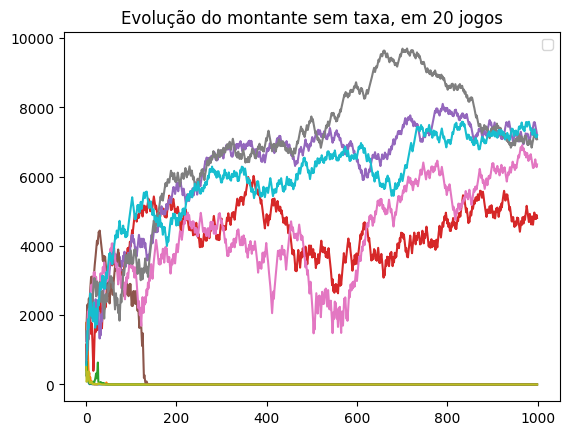

In [329]:
r = 1000
rounds = np.arange(r)
games = []
M_0 = 1000
for j in range(10):
    M = []
    M_n = M_0
    for i in range(r):
        prob = 0.5 + (((random.random()*2)-1)/10)   # probability of winning
        R = M_n / M_0
        if R >=1 :
            bet = M_0 * prob / (R)
        else: 
            bet = M_0 * prob
        resto = M_n - bet       # (1 - odd) M_n

        if resto > 0:

            if random.random() < prob: 
                multiplier = 1/ prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto

        else:
            if R >=1 :
                bet = M_n * prob / (R)
            else: 
                bet = M_n * prob
            resto = M_n - bet       # (1 - odd) M_n
            if random.random() < prob: 
                multiplier = 1/ prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto

            
    mountain = np.array(M)
    plt.plot(rounds, mountain)
plt.title("Evolução do montante sem taxa, em 20 jogos")
plt.legend()
plt.show()

Perceba que a taxa de 20% na odd faz com que, ao longo prazo, o jogador sempre perca.<br>
Perceba que, para $R>1$, o montante é relativamente estável, masquando $R<1$, na maioria das vezes o jogador não consegue recuperar, isto se dá pelo fato de que adotamos uma bet sem regulagem $R$. Então, vamos tentar achar uma regulagem quando $R<1$, para que o jogador tenha maiores chances de recuperar o montante. Para isso, adotemos a seguinte estratégia:


#### Estratégia agressiva em montantes pequenos $M_n < M_0$
Quando $R<1$, admitindo $odd=\frac{1}{P_n}$ e $P_n$ variando entre 40% e 60% aleatóriamente, a bet conservadora será definida como:
$$ bet = M_n\times P_n \times (1-R)$$
Para que, em $M_n$ muito pequenos, o bet seja mais agressivo.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


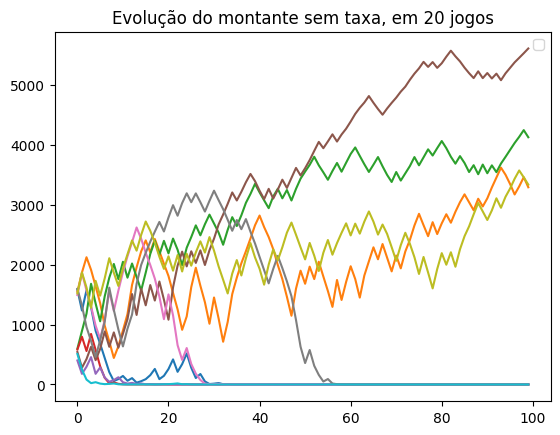

In [320]:
r = 100
rounds = np.arange(r)
games = []
M_0 = 1000
for j in range(10):
    M = []
    M_n = M_0
    for i in range(r):
        prob = 0.5 + (((random.random()*2)-1)/10)   # probability of winning
        R = M_n / M_0
        if R >=1 :
            bet = M_0 * prob / (R)
        else: 
            bet = M_n* prob * (1.5-R)
        resto = M_n - bet       # (1 - odd) M_n

        if resto > 0:

            if random.random() < prob: 
                multiplier = 1/ prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto

        else:
            bet = M_n * prob *(1.5-R)
            resto = M_n - bet       # (1 - odd) M_n
            if random.random() < prob: 
                multiplier = 1/ prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto

            
    mountain = np.array(M)
    plt.plot(rounds, mountain)
plt.title("Evolução do montante sem taxa, em 20 jogos")
plt.legend()
plt.show()

#### E se a probabilidade, na realidade, for uma distribuição normal?

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


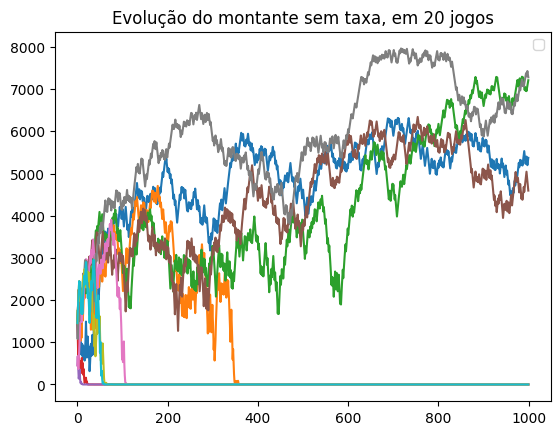

In [332]:
r = 1000
rounds = np.arange(r)
games = []
M_0 = 1000
for j in range(10):
    M = []
    M_n = M_0
    for i in range(r):
        num = np.random.normal(loc=50, scale=5.0, size=None)/100  # probability of winning
        R = M_n / M_0
        if R >=1 :
            bet = M_0 * prob / (R)
        else: 
            bet = M_n* prob * (1.5-R)
        resto = M_n - bet       # (1 - odd) M_n

        if resto > 0:

            if random.random() < prob: 
                multiplier = 1/ prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto

        else:
            bet = M_n * prob *(1.5-R)
            resto = M_n - bet       # (1 - odd) M_n
            if random.random() < prob: 
                multiplier = 1/ prob 
                M.append((bet * multiplier) + resto)
                M_n = resto + (bet * multiplier)
            else: 
                M.append(resto)
                M_n = resto

            
    mountain = np.array(M)
    plt.plot(rounds, mountain)
plt.title("Evolução do montante sem taxa, em 20 jogos")
plt.legend()
plt.show()